In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mpl

In [26]:
plt.style.use('fivethirtyeight')

In [2]:
def company_data(ticker):
    days_to_subtract = 100
    end_date = (datetime.today())
    start_date = end_date-timedelta(days=days_to_subtract)

    end_date = end_date.strftime('%Y-%m-%d')
    start_date = start_date.strftime('%Y-%m-%d')
    print (end_date)
    
    company = yf.Ticker(ticker)
    historical_df = company.history(period='1d', interval = '1d', start = start_date)
    return historical_df

In [3]:
ticker = 'ZG'
historical_df = company_data(ticker)
open_prices = historical_df['Open'].values
close_prices = historical_df['Close'].values
high_prices = historical_df['High'].values
low_prices = historical_df['Low'].values
dates = historical_df.index

2021-02-11


In [17]:
historical_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-30,29.219999,29.690001,28.950001,29.549999,549700,0,0
2019-10-01,29.629999,30.059999,29.120001,29.450001,649500,0,0
2019-10-02,29.139999,29.170000,28.420000,28.600000,785000,0,0
2019-10-03,28.549999,29.110001,28.120001,29.100000,407400,0,0
2019-10-04,29.469999,29.799999,29.030001,29.680000,576400,0,0
...,...,...,...,...,...,...,...
2021-02-05,161.679993,167.119995,161.100006,163.759995,971000,0,0
2021-02-08,165.399994,169.270004,163.399994,169.080002,1361200,0,0
2021-02-09,168.009995,175.600006,166.669998,172.929993,891800,0,0


In [18]:
weights_50 = np.arange(1,51)
weights_200 = np.arange(1,201)

In [22]:
wma50 = historical_df['Close'].rolling(50).apply(lambda prices: np.dot(prices, weights_50)/weights_50.sum(), raw=True)
wma200 = historical_df['Close'].rolling(200).apply(lambda prices: np.dot(prices, weights_200)/weights_200.sum(), raw=True)
wma200.tail()

Date
2021-02-05    110.066120
2021-02-08    110.836622
2021-02-09    111.638902
2021-02-10    112.422439
2021-02-11    113.445302
Name: Close, dtype: float64

In [27]:
historical_df['wma_50'] = wma50
historical_df['wma_200'] = wma200

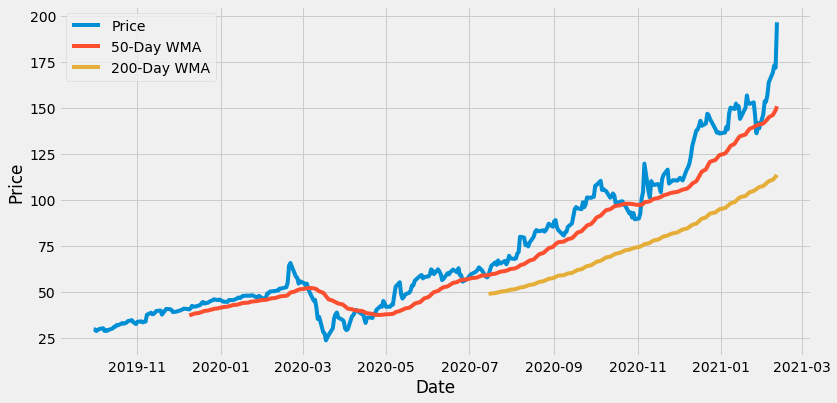

In [30]:
sma10 = historical_df['Close'].rolling(10).mean()
plt.figure(figsize = (12,6))
plt.plot(historical_df['Close'], label="Price")
plt.plot(wma50, label="50-Day WMA")
plt.plot(wma200, label="200-Day WMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [31]:
ema50 = historical_df['Close'].ewm(span=50, adjust=False).mean()
ema200 = historical_df['Close'].ewm(span=200, adjust=False).mean()

In [32]:
historical_df['ema_50'] = ema50
historical_df['ema_200'] = ema200

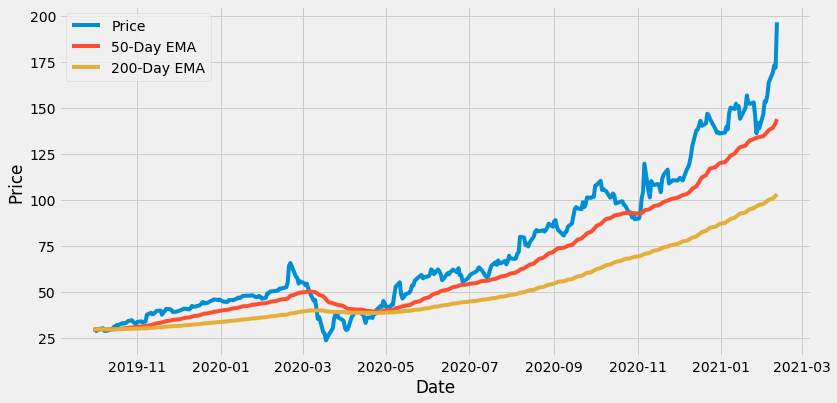

In [33]:
plt.figure(figsize = (12,6))
plt.plot(historical_df['Close'], label="Price")
plt.plot(ema50, label="50-Day EMA")
plt.plot(ema200, label="200-Day EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Macd

In [4]:
ticker = 'ZG'
historical_df = company_data(ticker)
historical_df['price'] = np.abs(historical_df.Close-historical_df.Open)/2

2021-02-11


In [5]:
historical_df.index

DatetimeIndex(['2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06',
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-07',
               '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
      

In [6]:
test = historical_df[(historical_df.index>'2018-06-30') & (historical_df.index<'2019-04-30')]

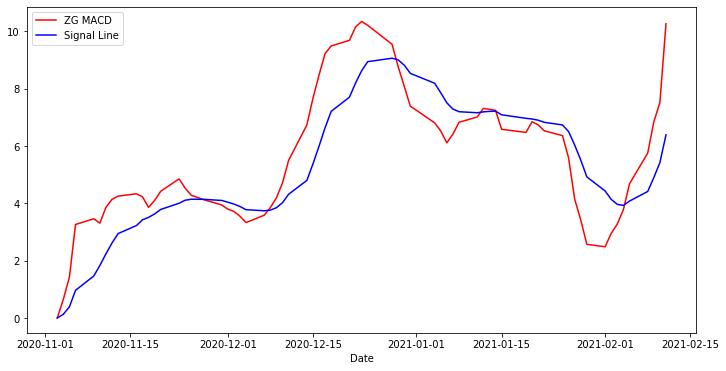

In [8]:
plt.figure(figsize = (12,6))
exp1 = historical_df.Close.ewm(span=12, adjust=False).mean()
exp2 = historical_df.Close.ewm(span=26, adjust=False).mean()
macd = exp1-exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
plt.plot(historical_df.index, macd, label='ZG MACD', color = 'red')
plt.plot(historical_df.index, exp3, label='Signal Line', color='blue')

plt.legend(loc='upper left')
plt.xlabel("Date")
plt.show()

In [10]:
historical_df['MACD'] = macd
historical_df['signal'] = exp3

In [33]:
historical_df[(historical_df.index>'2020-12-06')&(historical_df.index<='2020-12-11')]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,price,MACD,signal
Date,,,,,,,,,,
2020-12-07,110.510002,117.489998,110.510002,116.360001,521900,0,0,2.924999,3.585311,3.739822
2020-12-08,116.570000,118.599998,114.220001,117.629997,694600,0,0,0.529999,3.847888,3.761435
2020-12-09,118.489998,127.349998,118.300003,119.900002,928000,0,0,0.705002,4.190843,3.847317
2020-12-10,119.040001,126.639999,117.790001,123.650002,840000,0,0,2.305000,4.710927,4.020039
2020-12-11,123.419998,129.380005,123.419998,129.029999,740000,0,0,2.805000,5.493887,4.314808


In [23]:
counter = 0
for i, row in historical_df.iterrows():
    
    
    if counter ==0:
        counter +=1
        continue
    else:
        if row['MACD'] < row['signal'] and historical_df.iloc[counter-1]['MACD'] >= historical_df.iloc[counter-1]['signal']:
            print (row)
            counter +=1
        elif row['MACD'] > row['signal'] and historical_df.iloc[counter-1]['MACD'] <= historical_df.iloc[counter-1]['signal']:
            print (row)
            counter +=1
        else:
            counter +=1
            continue
    

Open                95.180000
High               100.919998
Low                 94.779999
Close              100.610001
Volume          903900.000000
Dividends            0.000000
Stock Splits         0.000000
price                2.715000
MACD                 0.650143
signal               0.130029
Name: 2020-11-04 00:00:00, dtype: float64
Open               110.480003
High               110.830002
Low                108.820000
Close              110.599998
Volume          433200.000000
Dividends            0.000000
Stock Splits         0.000000
price                0.059998
MACD                 4.130513
signal               4.139501
Name: 2020-11-27 00:00:00, dtype: float64
Open               116.570000
High               118.599998
Low                114.220001
Close              117.629997
Volume          694600.000000
Dividends            0.000000
Stock Splits         0.000000
price                0.529999
MACD                 3.847888
signal               3.761435
Name: 2020-12-08

In [41]:
-historical_df[historical_df.index == '2020-12-08'].Close.values[0]
+historical_df[historical_df.index == '2020-12-29'].Close.values[0]
-historical_df[historical_df.index == '2021-01-12'].Close.values[0]
+historical_df[historical_df.index == '2021-01-15'].Close.values[0]
-historical_df[historical_df.index == '2021-02-05'].Close.values[0]
+historical_df[historical_df.index == '2021-02-11'].Close.values[0]

200.60000610351562

In [42]:
-historical_df.iloc[0].Close+ historical_df.iloc[-1].Close

108.14000701904297

In [44]:
historical_df.iloc[-1].Close

200.60000610351562

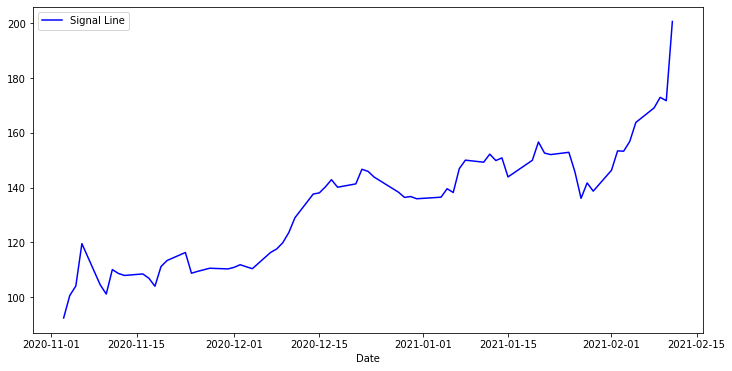

In [9]:
plt.figure(figsize = (12,6))

plt.plot(historical_df.index, historical_df.Close, label='Signal Line', color='blue')

plt.legend(loc='upper left')
plt.xlabel("Date")
plt.show()